# extracting_waveforms
## Claude de Rijke-Thomas
### 30th Oct 2018 -- 

In [1]:
import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt
import scipy.io
from scipy.integrate import simps

There are 127 points in this waveform.
The area under the waveform is 370801.33333333326


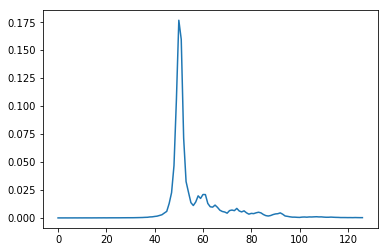

In [2]:
source_packet_ID = []
block_no = []
not_used = []
lat = []
lon = []
waveform_data = []

waveform = np.loadtxt('/Users/claudederijkethomas/Desktop/Ice/Proj/CS_OFFL_SIR_SAR_1B_20140515T080546_20140515T081235_B001.wfm')

for row in waveform:
    source_packet_ID.append(row[0])
    block_no.append(row[1])
    not_used.append(row[2])
    lat.append(row[3])
    lon.append(row[4])
    waveform_data.append(row[5:-1])

# plt.plot(range(len(waveform_data[0])), waveform_data[0])
plt.draw()
print("There are",len(waveform_data[0]), "points in this waveform.")
waveform_data_area = simps(waveform_data[0], dx=1)
print("The area under the waveform is", waveform_data_area)
norm_waveform_data = [x/waveform_data_area for x in waveform_data]
norm_waveform = norm_waveform_data[0]
plt.plot(range(len(norm_waveform)), norm_waveform)

Extracting Simulated Echoes from Jack Landy's Code

In [17]:
sim_echo = scipy.io.loadmat('/Users/claudederijkethomas/Desktop/Ice/Proj/FEM_Sim_NLP1.mat')


The area under the echo curve is: 2.786597866970441e-06
There are 139 points in this simulated echo.


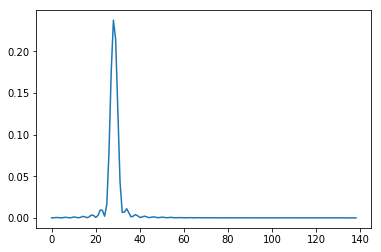

In [21]:
simulated_echo = [sim_echo['P_t_ml_range'][1][1][1][0][i][0] for i in range(len(sim_echo['P_t_ml_range'][1][1][1][1]))]

simulated_echo_area = simps(simulated_echo, dx = 1)
norm_sim_echo = [x/simulated_echo_area for x in simulated_echo]
print("The area under the echo curve is:",simulated_echo_area)
plt.plot(range(len(norm_sim_echo)), norm_sim_echo)
print("There are",len(simulated_echo), "points in this simulated echo.")

In [22]:
print(norm_sim_echo)

[5.618360648236377e-05, 0.00020233634733441506, 0.0005234188004563268, 0.00039986497417360777, 7.56041544460757e-05, 0.00027845441320584213, 0.0007292826481375519, 0.0005637529180105773, 0.0001073157258877276, 0.00040748515722255016, 0.0010859371632836465, 0.0008541349028451014, 0.00016462902780688409, 0.0006530943901112326, 0.0017870149757150218, 0.0014450740444625484, 0.000285069146937757, 0.0012134215679778955, 0.003475708623019179, 0.0029566561899012876, 0.0006085409013043981, 0.0029875765888448713, 0.009481586875871426, 0.009112807741489037, 0.0020700640993112436, 0.016155131887578524, 0.08003183582930282, 0.17555553455617479, 0.23709748953444204, 0.2143934257893087, 0.12727218775362534, 0.04316165573026195, 0.006643937023228136, 0.006961506443662823, 0.01104710202595515, 0.0062011935384712275, 0.0012313767367915244, 0.0021447118405509605, 0.00396680783220213, 0.0025055045583666376, 0.0006005249133039974, 0.0011005114385454692, 0.002075893883818767, 0.0013901788742556734, 0.000388

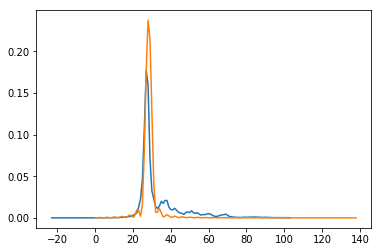

In [23]:
for i in range(int(sorted([len(norm_sim_echo), len(norm_waveform)])[1])):
    try:
        t=norm_sim_echo[i]
    except IndexError:
        np.append(norm_sim_echo,0)
    try:
        u = norm_waveform[i]
    except IndexError:
        np.append(norm_waveform,0)
        
shift = (np.argmax(signal.correlate(norm_sim_echo, norm_waveform)) - len(norm_waveform))
plt.plot(range(len(norm_waveform)) + shift, norm_waveform)
plt.plot(range(len(norm_sim_echo)), norm_sim_echo)

## EXAMPLE TAKEN FROM:
# for target in [data1, data2]:
#     dx = np.mean(np.diff(data0.x.values))
#     shift = (np.argmax(signal.correlate(data0.y, target.y)) - len(target.y)) * dx
#     plt.plot(target.x + shift, target.y)

This is still not a format usable by a neural network, because the two arrays still dont overlay onto each other. An if condition loop could easily be made to produce derived waveforms using data corresponding to x values where both the simulated and observed waveform have non-zero values, although these would not be able to train a neural network; this is because the array sizes of different simulation-observation echo pairs would differ.

The maximum discrepancy between the datasets is the sum of the different array sizes, and so zero values will be added to each array where there is no data.


266
-23


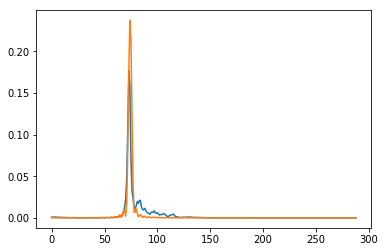

In [24]:
#array size required by neural network:
req_arr_size = sum([len(norm_sim_echo), len(norm_waveform)])
print(req_arr_size)
nn_obs_waveform = []
nn_sim_waveform = []
lowest_range = np.min(shift,0)
print(lowest_range)
for i in range(lowest_range, req_arr_size):
    pass
    try: nn_obs_waveform.append(norm_waveform[i])
    except IndexError:
        nn_obs_waveform.append(0.0)
    try: nn_sim_waveform.append(norm_sim_echo[i+shift])
    except IndexError:
        nn_sim_waveform.append(0.0)
plt.plot(range(len(nn_obs_waveform)), nn_obs_waveform)
plt.plot(range(len(nn_sim_waveform)), nn_sim_waveform)

Although the length of these arrays are perfecct for a neural network, it is still not an appropriate format, as the peaks' position could differ between different sim-obs waveform pairs. Also the left tail should have values that equal zero.


I decided to make the final number of range bins equal to the range bins of the simulated pulse, as every other range bin would be 0 for the simulated pulse anyway

139
139
[5.393723862913115e-05, 6.202782442350083e-05, 5.663410056058771e-05, 7.281527214932705e-05, 5.663410056058771e-05, 7.01184102178705e-05, 6.472468635495738e-05, 8.360271987515329e-05, 6.742154828641394e-05, 8.629958180660984e-05, 7.281527214932705e-05, 9.439016760097952e-05, 8.360271987515329e-05, 8.89964437380664e-05, 7.551213408078362e-05, 0.00010517761532680576, 9.439016760097952e-05, 0.0001213587869155451, 0.0001078744772582623, 0.000140236820435741, 0.00011057133918971887, 0.00013484309657282788, 0.00014293368236719756, 0.00015102426816156723, 0.00015372113009302378, 0.00015372113009302378, 0.00016720543975030659, 0.00019147719713341559, 0.00020226464485924184, 0.00021844581644798116, 0.00021844581644798116, 0.00022653640224235084, 0.0002723830550771123, 0.00031553284598041727, 0.000372166946541005, 0.0004261041851701361, 0.0005555535578800509, 0.0006202782442350082, 0.0009169330566952297, 0.0010140200862276657, 0.0013619152753855616, 0.001634298330462674, 0.00224648598890

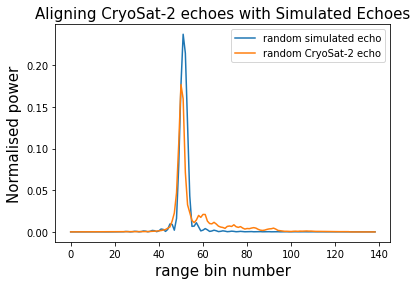

In [42]:
arr_sim = []
arr_obs = []
for i in range(len(norm_sim_echo)):
    arr_sim.append(norm_sim_echo[i+shift])
    try:
        arr_obs.append(norm_waveform[i])
    except:
        arr_obs.append(0)
plt.title('Aligning CryoSat-2 echoes with Simulated Echoes', fontsize = 15)
plt.plot(range(len(arr_sim)), arr_sim, label = 'random simulated echo')
plt.plot(range(len(arr_obs)), arr_obs, label = 'random CryoSat-2 echo')
plt.xlabel('range bin number', fontsize = 15)
plt.ylabel('Normalised power', fontsize = 15)
plt.legend(loc = 'best')
plt.savefig('RandomCryoSat2Echo.png', dpi= 200)
print(len(arr_sim))
print(len(arr_obs))
print(arr_obs)

In [41]:
import pickle
pickle_out = open("file.pickle", 'wb')
data = pickle.dump(arr_obs, pickle_out)
pickle_out.close()